<a href="https://colab.research.google.com/github/jannat99/ML/blob/main/cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**importing libraries**

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from string import digits
from pandas import DataFrame
import seaborn as sn
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

**importing dataset**

In [2]:
dataset = pd.read_csv('Dataset.csv')
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values
#print("\nDataset without last column : \n",X)
#print("\nDataset of only last column : \n",Y)

**encoding dependent variable(last column only)**

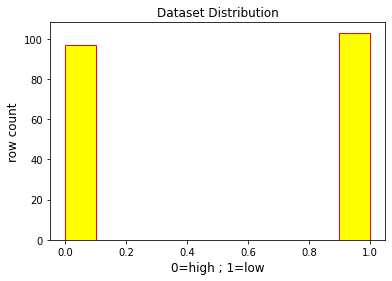

In [3]:
le = LabelEncoder()
Y = le.fit_transform(Y)
#print("\nAfter label encoding : \n",Y)
plt.hist(Y, color='yellow', edgecolor='red',bins=10)
plt.xlabel("0=high ; 1=low", fontsize=12)
plt.ylabel("row count", fontsize=12)
plt.title("Dataset Distribution", fontsize=12)
plt.show()

**Splitting the dataset into the Training set and Test set**

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)

**Feature Scaling**

In [5]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#print("\nAfter Feature Scaling the trained data of X : \n",X_train)
#print("\nAfter Feature Scaling the test data of X : \n",X_test)

**Graph**

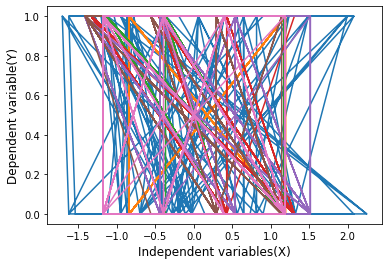

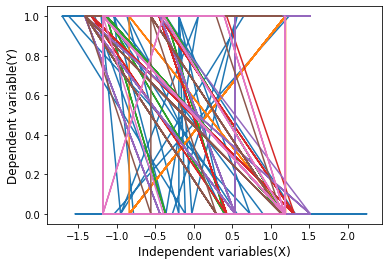

In [6]:
plt.plot(X_train,Y_train)
plt.xlabel("Independent variables(X)", fontsize=12)
plt.ylabel("Dependent variable(Y)", fontsize=12)
plt.show()
plt.plot(X_test,Y_test)
plt.xlabel("Independent variables(X)", fontsize=12)
plt.ylabel("Dependent variable(Y)", fontsize=12)
plt.show()

**Train dataset**

In [7]:
train1 = LogisticRegression(random_state = 0)
train1.fit(X_train, Y_train)
train2 = DecisionTreeClassifier(criterion = 'entropy',random_state=0)
train2.fit(X_train,Y_train)
train3 =KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 7)
train3.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=8, p=7)

**Predicting a new result**

In [8]:
result1 = train1.predict(sc.transform([[28,1,4,3,4,4,2]]))
result2 = train2.predict(sc.transform([[28,1,4,3,4,4,2]]))
result3 = train3.predict(sc.transform([[28,1,4,3,4,4,2]]))
print('\n--------------------------------------------------------------------')
print('Predicted result for:')
print('--------------------------------------------------------------------')
print('\tlogistic regression          : ', result1)
print('\tDecision Tree Classification : ', result2)
print('\tK-Nearest Neighbors          : ', result3)


--------------------------------------------------------------------
Predicted result for:
--------------------------------------------------------------------
	logistic regression          :  [0]
	Decision Tree Classification :  [1]
	K-Nearest Neighbors          :  [0]


**Predicting the Test set results**

In [9]:
Y_pred1 = train1.predict(X_test)
predTest1 = np.concatenate((Y_pred1.reshape(len(Y_pred1),1), Y_test.reshape(len(Y_test),1)),axis=1)
Y_pred2 = train2.predict(X_test)
predTest2 = np.concatenate((Y_pred2.reshape(len(Y_pred2),1), Y_test.reshape(len(Y_test),1)),axis=1)
Y_pred3 = train3.predict(X_test)
predTest3 = np.concatenate((Y_pred3.reshape(len(Y_pred3),1), Y_test.reshape(len(Y_test),1)),axis=1)

#print(predTest1)
#print(predTest2)
#print(predTest3)

**Making the Confusion Matrix (labels=["high=0", "low=1"])**

In [10]:
cm1 = metrics.confusion_matrix(Y_test, Y_pred1)
cm2 = metrics.confusion_matrix(Y_test, Y_pred2)
cm3 = metrics.confusion_matrix(Y_test, Y_pred3)

columns = ['%s' %(i) for i in list(digits)[0:len(np.unique(Y_test))]]

**confusion matrix in graph for logistic regression**


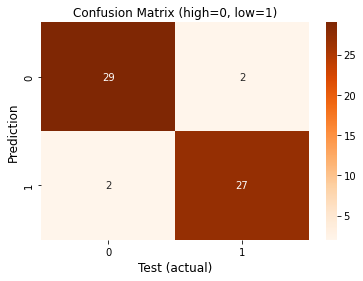

In [11]:
graph1 = DataFrame(cm1, index=columns, columns=columns)
ax1 = sn.heatmap(graph1, cmap='Oranges', annot=True)
plt.xlabel('Test (actual)', fontsize=12)
plt.ylabel('Prediction', fontsize=12)
plt.title('Confusion Matrix (high=0, low=1)', fontsize=12)
plt.show()

**confusion matrix in graph for decision tree classification**

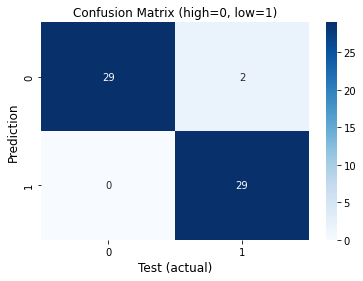

In [12]:
graph2 = DataFrame(cm2, index=columns, columns=columns)
ax2 = sn.heatmap(graph2, cmap='Blues', annot=True)
plt.xlabel('Test (actual)', fontsize=12)
plt.ylabel('Prediction', fontsize=12)
plt.title('Confusion Matrix (high=0, low=1)', fontsize=12)
plt.show()

**confusion matrix in graph for K-Nearest Neighbors**

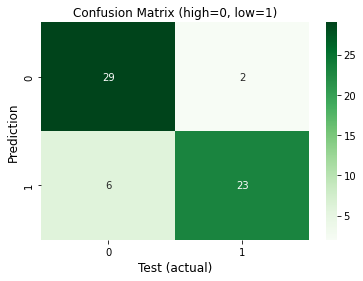

In [13]:
graph3 = DataFrame(cm3, index=columns, columns=columns)
ax3 = sn.heatmap(graph3, cmap='Greens', annot=True)
plt.xlabel('Test (actual)', fontsize=12)
plt.ylabel('Prediction', fontsize=12)
plt.title('Confusion Matrix (high=0, low=1)', fontsize=12)
plt.show()

**Result**

In [14]:
a1 = format(accuracy_score(Y_test, Y_pred1)*100, ".0f")
a2 = format(accuracy_score(Y_test, Y_pred2)*100, ".0f")
a3 = format(accuracy_score(Y_test, Y_pred3)*100, ".0f")
p1 = format(precision_score(Y_test, Y_pred1)*100, ".0f")
p2 = format(precision_score(Y_test, Y_pred2)*100, ".0f")
p3 = format(precision_score(Y_test, Y_pred3)*100, ".0f")
r1 = format(recall_score(Y_test, Y_pred1)*100, ".0f")
r2 = format(recall_score(Y_test, Y_pred2)*100, ".0f")
r3 = format(recall_score(Y_test, Y_pred3)*100, ".0f")
f11 = format(f1_score(Y_test, Y_pred1)*100, ".0f")
f12 = format(f1_score(Y_test, Y_pred2)*100, ".0f")
f13 = format(f1_score(Y_test, Y_pred3)*100, ".0f")

print('\n--------------------------------------------------------------------')
print('Find accuracy, precision, recall, f1-score:')
print('--------------------------------------------------------------------')
print('\t\t\t\t\t\t\t Accuracy\tPrecision\tRecall\tf1-score')
print('\t\t\t\t\t\t\t --------\t---------\t------\t--------')
print('\nLogistic Regression         :',a1,'%''\t\t', p1,'%''\t\t', r1,'%''\t', f11,'%')
print('Decision Tree Classification:',a2,'%''\t\t', p2,'%''\t\t', r2,'%''\t', f12,'%')
print('K-Nearest Neighbors         :',a3,'%''\t\t', p3,'%''\t\t', r3,'%''\t', f13,'%')


--------------------------------------------------------------------
Find accuracy, precision, recall, f1-score:
--------------------------------------------------------------------
							 Accuracy	Precision	Recall	f1-score
							 --------	---------	------	--------

Logistic Regression         : 93 %		 93 %		 93 %	 93 %
Decision Tree Classification: 97 %		 94 %		 100 %	 97 %
K-Nearest Neighbors         : 87 %		 92 %		 79 %	 85 %
